In [2]:
from astropy.io import fits
import pandas as pd
from astropy.table import Table
from matplotlib.pyplot import *
from prospectFunctions import *

In [3]:
hdulfile = fits.open('./rubies-uds31-v4_prism-clear_4233_154183.spec.fits')
# Documents/REU/Notebooks/rubies-uds31-v4_prism-clear_4233_154183.spec.fits

In [4]:
hdulfile.info()

Filename: ./rubies-uds31-v4_prism-clear_4233_154183.spec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SPEC1D        1 BinTableHDU    367   473R x 9C   [D, D, D, D, D, D, D, D, D]   
  2  SCI           1 ImageHDU       344   (473, 31)   float64   
  3  WHT           1 ImageHDU       344   (473, 31)   float64   
  4  PROFILE       1 ImageHDU       344   (473, 31)   float64   
  5  PROF1D        1 BinTableHDU     25   31R x 3C   [D, D, D]   
  6  BACKGROUND    1 ImageHDU       344   (473, 31)   float64   
  7  SLITS         1 BinTableHDU    107   3R x 49C   [67A, K, K, D, D, D, D, D, K, 11A, D, D, D, D, 3A, K, K, D, D, K, K, K, K, K, K, K, 4A, 5A, 5A, 25A, K, K, D, K, K, K, 12A, D, D, D, D, 17A, K, K, 4A, K, K, D, D]   


In [5]:
hdul = hdulfile[0]
hdul_spec = hdulfile['SPEC1D']
hdul_spec
table_data = hdul_spec.data
table_data.columns

ColDefs(
    name = 'wave'; format = 'D'; unit = 'um'
    name = 'flux'; format = 'D'; unit = 'uJy'
    name = 'err'; format = 'D'; unit = 'uJy'
    name = 'sky'; format = 'D'; unit = 'uJy'
    name = 'path_corr'; format = 'D'
    name = 'npix'; format = 'D'
    name = 'flux_sum'; format = 'D'
    name = 'profile_sum'; format = 'D'
    name = 'var_sum'; format = 'D'
)

In [8]:
hdul_header = hdul.header
hdul_data = hdul.data
print(type(hdul_header))
print(type(hdul_data))
astropy_table = Table(table_data)
astropy_table

<class 'astropy.io.fits.header.Header'>
<class 'NoneType'>


wave,flux,err,sky,path_corr,npix,flux_sum,profile_sum,var_sum
float64,float64,float64,float64,float64,float64,float64,float64,float64
0.54,nan,nan,nan,nan,0.0,0.0,0.0,0.0
0.5429924907410937,nan,nan,nan,nan,0.0,0.0,0.0,0.0
0.5460340296489751,nan,nan,nan,nan,0.0,0.0,0.0,0.0
0.549125977329285,0.04914232480173436,0.1699736699172536,-0.0408411080489221,1.069178499648684,5.0,0.1305440076396333,0.8737567879719772,0.15826199062146118
0.5522694495525959,0.09807594974103342,0.0717266852151257,-0.0197224538559838,1.0661962039544441,13.0,-0.0743338488888088,2.2729917549254015,0.11320317619280042
0.5554660585535945,-0.02904598205050653,0.0520038695163673,-0.029949921609136117,1.0672219438911963,16.0,-0.002171238371610061,2.8840594254874086,0.07992059225860915
0.5587169324053721,0.025593238756541334,0.04449660329477926,-0.01705602521749412,1.0614639763235363,13.0,0.1759849652370241,2.624852572030571,0.05286808176813662
0.5620237452009996,0.010956091684894548,0.043913169601774514,-0.028209706413056475,1.056452064769609,14.0,-0.05288627489294004,2.239366032068235,0.04659720815374273
0.5653878707062455,-0.009197897474104575,0.03861939282831003,0.0003540712643075303,1.0630773890308638,13.0,-0.08084726916302157,2.768507298475795,0.027541219054890303


In [9]:
print((astropy_table['flux'][3], astropy_table['err'][3], astropy_table['flux_sum'][3]))

(np.float64(0.04914232480173436), np.float64(0.1699736699172536), np.float64(0.1305440076396333))


In [10]:
import astropy.units as u
import astropy.constants as const

flux_density_spec = []
flux_density_err = []

wspec = astropy_table['wave'].copy()
init_spec = astropy_table['flux'].copy()
# init_err = astropy_table['profile_sum'].copy()

for wave,mjy in zip(wspec,init_spec):
    jy = mjy * 1e-6 * u.Jy
    flux = jy.to(u.erg / u.cm**2 / u.s / u.AA, equivalencies=u.spectral_density(wave*10000*u.AA))
    # err = jy.to(u.erg / u.cm**2 / u.s / u.AA, equivalencies=u.spectral_density(wave*10000*u.AA))
    flux_density_spec.append(flux.value*10**20)
    # flux_density_err.append(err.value*10**20)

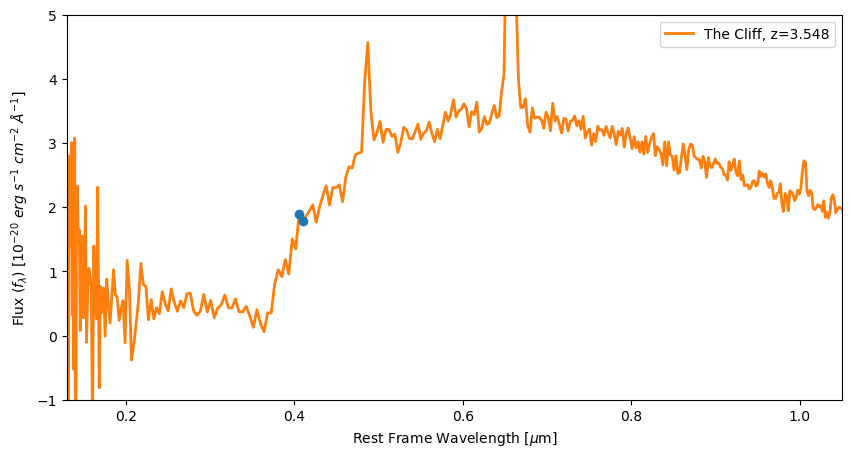

In [11]:
astropy_table = Table(table_data)

figure(figsize=(10,5))
zred = 3.548
a = 1.0 + zred

y = np.logspace(np.log10(astropy_table['flux'].min()),1, 10)
x = np.ones(10)*2

plot(astropy_table['wave'][117:119]/a,flux_density_spec[117:119], 'o', zorder=3)
plot(astropy_table['wave']/a,flux_density_spec, lw=2, label=f'The Cliff, z={zred}', zorder=2)
# plot(astropy_table['wave']/a,flux_density_err, lw=2, alpha=0.9, label=f'error', zorder=1)

plot(x,y)

# yscale('log')

# xmin, xmax = (.3), .9
# xlim([xmin,xmax])
xlim([.13,1.05])
ylim([-1,5])

xlabel(r'Rest Frame Wavelength [$\mu$m]')
ylabel(r'Flux ($f_{\lambda}$) [$10^{-20}$ $erg$ $s^{-1}$ $cm^{-2}$ $\AA^{-1}$]')

legend()

show()

In [12]:
hdul_header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

In [13]:
imf_type = 2

imf_types = ['Salpeter (1955)', 'Chabrier (2003)', 'Kroupa (2001)', 'van Dokkum (2008)', 'Dave (2008)']

grid_ranges, run_params = getParams(imf_type=imf_type, len_logz=100, len_dust=6, len_tage=100, dust=True)
a = 1.0 + run_params['zred']

logzs = grid_ranges['logzsol']
dusts = grid_ranges['dust2']
tages = grid_ranges['tage']

num_models = len(logzs)*len(dusts)*len(tages)

obs = getObs(**run_params)
sps = getSps(**run_params)
wspec, wphot = getWave(obs=obs, sps=sps, **run_params)

In [14]:
data_grid_params = np.load(f'params_imf_{imf_type}_{num_models}.npy')
data_grid_spec = np.load(f'specs_imf_{imf_type}_{num_models}.npy')
data_grid_breaks_Anna = np.load(f'breaks_Anna_imf_{imf_type}_{num_models}.npy')
data_grid_breaks_D4000 = np.load(f'breaks_D4000_imf_{imf_type}_{num_models}.npy')

In [15]:
def plotBalmerBreakRestFrame(zred=None, **extras):

    # a = 1.0 + zred
    
    balmer = np.ones(2)*3646
    
    y = np.linspace(0,1e10,2)
    
    lower_1 = np.ones(2)*3620
    upper_1 = np.ones(2)*3720
    
    lower_3 = np.ones(2)*4000
    upper_3 = np.ones(2)*4100

    alpha = 0.6
    lw = 1
    ls = '--'
    
    plot(lower_1/10000,y,color='blue',ls=ls,lw=lw,alpha=alpha)
    plot(upper_1/10000,y,color='blue',ls=ls,lw=lw,alpha=alpha)

    plot(lower_3/10000,y,color='red',ls=ls,lw=lw,alpha=alpha)
    plot(upper_3/10000,y,color='red',ls=ls,lw=lw,alpha=alpha)

In [16]:
start = .4000

for i,s in enumerate((astropy_table['wave']/a)>start):
    if s:
        print(i, (astropy_table['wave']/a)[i])
        blue_lower = i
        break

for i,s in enumerate((astropy_table['wave']/a)<(start+.01)):
    if not s:
        print(i-1, (astropy_table['wave']/a)[i-1])
        blue_upper = i
        break

116 0.4015433434770616
118 0.40971894814318055


In [17]:
getBreakBounds(wspec/a, 4000, **run_params)

{'blue': [4855, 4859], 'red': [4855, 4859]}

In [50]:
getBreakBounds(astropy_table['wave']/a, .3620, **run_params)

UnboundLocalError: cannot access local variable 'blue_lower' where it is not associated with a value

In [62]:
flux_density_spec[116:118]
astropy_table['wave'][107]/a
astropy_table['wave'][109]/a

np.mean(flux_density_spec[116:118])/np.mean(flux_density_spec[107:109])

np.float64(7.869254765028286)

(0.13, 1.05)

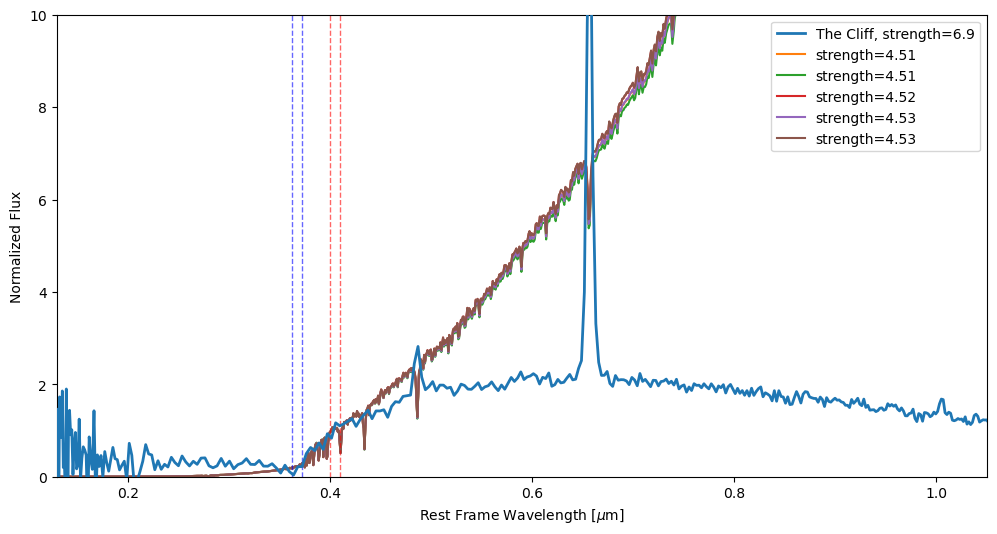

In [44]:
i_logz,i_dust,i_tage = 0,0,0

figure(figsize=(12,6))

arr_4d = data_grid_breaks_Anna

flat_arr = arr_4d.flatten()
top_5_flat_indices = np.argsort(flat_arr)[-5:]
top_5_indices_4d = np.unravel_index(top_5_flat_indices, arr_4d.shape)

avg = np.mean(flux_density_spec[116:118])
plot(astropy_table['wave']/a,flux_density_spec/avg, lw=2, label=f'The Cliff, strength={6.9}', zorder=10)

for i_logz,i_dust,i_tage in zip(top_5_indices_4d[0],top_5_indices_4d[1],top_5_indices_4d[2]):
    avg = np.mean(data_grid_spec[i_logz,i_dust,i_tage,804:915])
    plot(wspec/a/10000, data_grid_spec[i_logz,i_dust,i_tage,:]/avg, label=f'strength={data_grid_breaks_Anna[i_logz,i_dust,i_tage,0]:.2f}')

plotBalmerBreakRestFrame(**run_params)

xlabel(r'Rest Frame Wavelength [$\mu$m]')
ylabel(r'Normalized Flux')# ($f_{\lambda}$) [$10^{-20}$ $erg$ $s^{-1}$ $cm^{-2}$ $\AA^{-1}$]')

ylim([0,10])

legend()

xlim([.13,1.05])

In [30]:
data_grid_breaks_Anna.max()
flat_index = np.argmax(data_grid_breaks_Anna)
max_index_4d = np.unravel_index(flat_index, data_grid_breaks_Anna.shape)
flat_index, max_index_4d

(np.int64(59942), (np.int64(99), np.int64(5), np.int64(42), np.int64(0)))

In [31]:
import numpy as np

# Create a sample 4D NumPy array
arr_4d = data_grid_breaks_Anna

# Flatten the array
flat_arr = arr_4d.flatten()

# Get the indices that would sort the flattened array in ascending order
# Then take the last 5 indices, which correspond to the 5 largest values
top_5_flat_indices = np.argsort(flat_arr)[-5:]

# Convert the flat indices back to 4D indices
top_5_indices_4d = np.unravel_index(top_5_flat_indices, arr_4d.shape)

# Print the indices of the first 5 max values
print("Indices of the first 5 max values in the 4D array:")
for i in range(len(top_5_indices_4d[0])):
    index_tuple = tuple(idx[i] for idx in top_5_indices_4d)
    print(f"Value: {arr_4d[index_tuple]:.2f}, Index: {index_tuple}")

Indices of the first 5 max values in the 4D array:
Value: 4.51, Index: (np.int64(98), np.int64(5), np.int64(41), np.int64(0))
Value: 4.51, Index: (np.int64(99), np.int64(5), np.int64(40), np.int64(0))
Value: 4.52, Index: (np.int64(98), np.int64(5), np.int64(42), np.int64(0))
Value: 4.53, Index: (np.int64(99), np.int64(5), np.int64(41), np.int64(0))
Value: 4.53, Index: (np.int64(99), np.int64(5), np.int64(42), np.int64(0))


In [32]:
import numpy as np

# Create a sample 4D NumPy array
arr_4d = data_grid_breaks_Anna[:,0,:,:]

# Flatten the array
flat_arr = arr_4d.flatten()

# Get the indices that would sort the flattened array in ascending order
# Then take the last 5 indices, which correspond to the 5 largest values
top_5_flat_indices = np.argsort(flat_arr)[-5:]

# Convert the flat indices back to 4D indices
top_5_indices_4d = np.unravel_index(top_5_flat_indices, arr_4d.shape)

# Print the indices of the first 5 max values
print("Indices of the first 5 max values in the 4D array:")
for i in range(len(top_5_indices_4d[0])):
    index_tuple = tuple(idx[i] for idx in top_5_indices_4d)
    print(f"Value: {arr_4d[index_tuple]:.2f}, Index: {index_tuple}")

Indices of the first 5 max values in the 4D array:
Value: 2.91, Index: (np.int64(98), np.int64(41), np.int64(0))
Value: 2.91, Index: (np.int64(99), np.int64(40), np.int64(0))
Value: 2.92, Index: (np.int64(98), np.int64(42), np.int64(0))
Value: 2.92, Index: (np.int64(99), np.int64(41), np.int64(0))
Value: 2.93, Index: (np.int64(99), np.int64(42), np.int64(0))


In [33]:
top_5_indices_4d

(array([98, 99, 98, 99, 99]),
 array([41, 40, 42, 41, 42]),
 array([0, 0, 0, 0, 0]))

(0.13, 1.05)

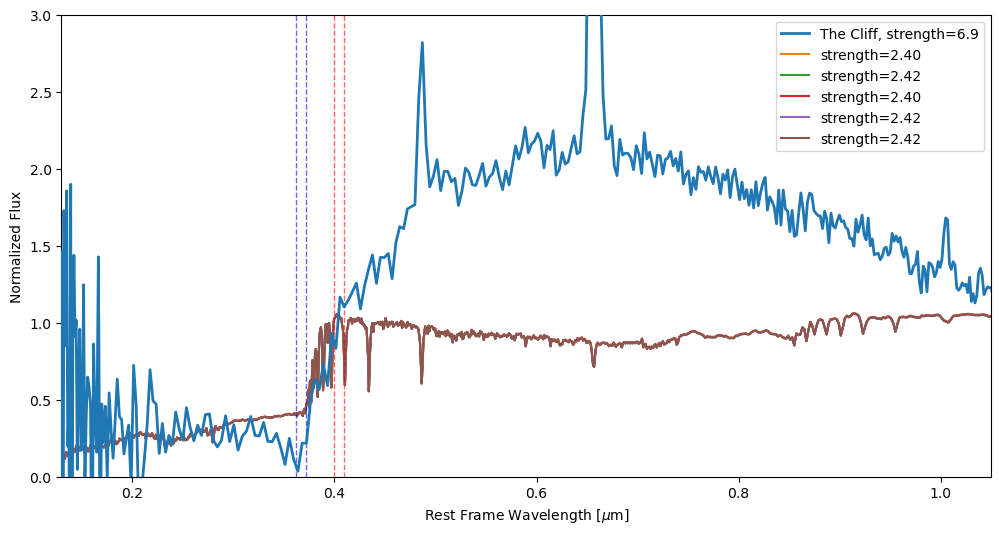

In [45]:
i_logz,i_dust,i_tage = 0,0,0

figure(figsize=(12,6))

arr_4d = data_grid_breaks_Anna

flat_arr = arr_4d.flatten()
top_5_flat_indices = np.argsort(flat_arr)[-5:]
top_5_indices_4d = np.unravel_index(top_5_flat_indices, arr_4d.shape)

avg = np.mean(flux_density_spec[116:118])
plot(astropy_table['wave']/a,flux_density_spec/avg, lw=2, label=f'The Cliff, strength={6.9}', zorder=10)

for i_logz,i_tage in zip(top_5_indices_4d[0],top_5_indices_4d[1]):
    avg = np.mean(data_grid_spec[i_logz,i_dust,i_tage,804:915])
    plot(wspec/a/10000, data_grid_spec[i_logz,i_dust,i_tage,:]/avg, label=f'strength={data_grid_breaks_Anna[i_logz,i_dust,i_tage,0]:.2f}')

plotBalmerBreakRestFrame(**run_params)

xlabel(r'Rest Frame Wavelength [$\mu$m]')
ylabel(r'Normalized Flux')# ($f_{\lambda}$) [$10^{-20}$ $erg$ $s^{-1}$ $cm^{-2}$ $\AA^{-1}$]')

ylim([0,3])

legend()

xlim([.13,1.05])

In [35]:
from prospect.models.templates import TemplateLibrary

In [36]:
TemplateLibrary['ssp']

{'zred': {'N': 1,
  'isfree': False,
  'init': 0.1,
  'units': 'redshift',
  'prior': <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=4.0)},
 'mass': {'N': 1,
  'isfree': True,
  'init': 10000000000.0,
  'units': 'Solar masses formed',
  'prior': <class 'prospect.models.priors.LogUniform'>(mini=100000000.0,maxi=1000000000000.0)},
 'logzsol': {'N': 1,
  'isfree': True,
  'init': -0.5,
  'units': '$\\log (Z/Z_\\odot)$',
  'prior': <class 'prospect.models.priors.TopHat'>(mini=-2,maxi=0.19)},
 'dust2': {'N': 1,
  'isfree': True,
  'init': 0.6,
  'units': 'optical depth at 5500AA',
  'prior': <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=2.0)},
 'sfh': {'N': 1, 'isfree': False, 'init': 0, 'units': 'FSPS index'},
 'tage': {'N': 1,
  'isfree': True,
  'init': 1,
  'units': 'Gyr',
  'prior': <class 'prospect.models.priors.TopHat'>(mini=0.001,maxi=13.8)},
 'imf_type': {'N': 1, 'isfree': False, 'init': 2},
 'dust_type': {'N': 1, 'isfree': False, 'init': 0}}

In [42]:
data_grid_params[0,0,41,4]

np.float64(0.34578838577504384)